In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj
import matplotlib.pyplot as plt

In [3]:
from pipeline import lab, experiment, tracking, ephys, psth
from pipeline import plot
from pipeline.plot import behavior_plot, unit_characteristic_plot

Connecting root@127.0.0.1:3306


# Top level ***ephys*** diagram

In [4]:
ephys_erd = ((dj.ERD(ephys.Unit)-2) + dj.ERD(ephys.TrialSpikes)
             + (dj.ERD(experiment.BrainLocation)-1)
             + dj.ERD(ephys.ProbeInsertion.InsertionLocation)
             + dj.ERD(psth.UnitSelectivity) + (dj.ERD(psth.PeriodSelectivity) - 1))

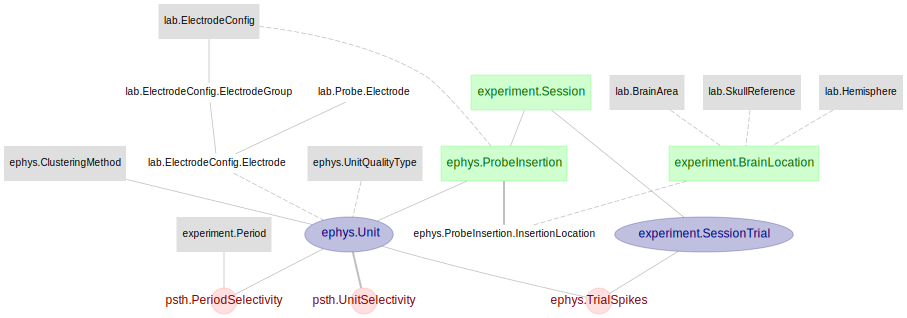

In [5]:
ephys_erd

# Top level ***behavior*** diagram

In [6]:
behav_erd = (dj.ERD(experiment.SessionTrial) - 1 
             + (dj.ERD(experiment.BrainLocation)-1) 
             + (dj.ERD(experiment.BehaviorTrial) + 1 - 1) 
             + (dj.ERD(experiment.PhotostimTrial) + 1 - 1)) 

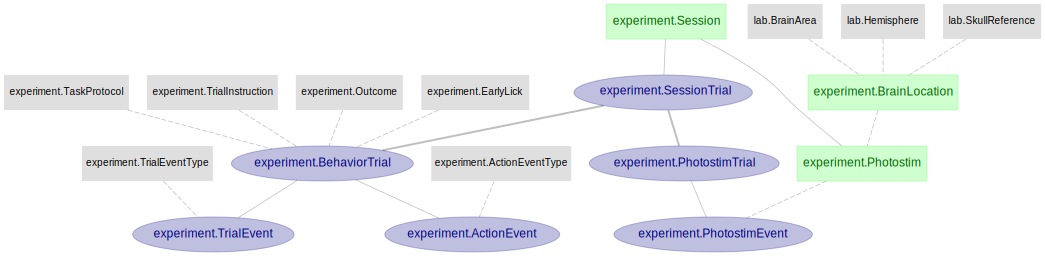

In [7]:
behav_erd

# Browsing of subjects

In [8]:
lab.Subject()

*subject_id    username     cage_number    date_of_birth  sex     animal_source 
+------------+ +----------+ +------------+ +------------+ +-----+ +------------+
123457         daveliu      145375         2017-08-03     M       Jackson labs  
397853         daveliu      144545         2017-07-15     M       Allen Institut
399752         daveliu      145375         2017-08-03     M       Jackson labs  
400480         daveliu      145700         2017-08-09     M       Allen Institut
406680         daveliu      148859         2017-10-06     F       Jackson labs  
407512         daveliu      151629         2017-10-13     M       Jackson labs  
407513         daveliu      148636         2017-10-13     M       Jackson labs  
   ...
 (Total: 13)

### Query one subject

In [9]:
# restrict by string
lab.Subject & 'subject_id=353936'

*subject_id    username     cage_number    date_of_birth  sex     animal_source 
+------------+ +----------+ +------------+ +------------+ +-----+ +------------+

 (Total: 0)

In [10]:
# restrict by dictionary
lab.Subject & {'subject_id': 397853}

*subject_id    username     cage_number    date_of_birth  sex     animal_source 
+------------+ +----------+ +------------+ +------------+ +-----+ +------------+
397853         daveliu      144545         2017-07-15     M       Allen Institut
 (Total: 1)

In [11]:
lab.Subject & {'sex': 'm'}

*subject_id    username     cage_number    date_of_birth  sex     animal_source 
+------------+ +----------+ +------------+ +------------+ +-----+ +------------+
123457         daveliu      145375         2017-08-03     M       Jackson labs  
397853         daveliu      144545         2017-07-15     M       Allen Institut
399752         daveliu      145375         2017-08-03     M       Jackson labs  
400480         daveliu      145700         2017-08-09     M       Allen Institut
407512         daveliu      151629         2017-10-13     M       Jackson labs  
407513         daveliu      148636         2017-10-13     M       Jackson labs  
412330         daveliu      154522         2017-12-05     M       Jackson labs  
   ...
 (Total: 9)

### Fetch back the subject key

In [12]:
subj_397853 = (lab.Subject & {'subject_id': 397853}).fetch1('KEY')  # "fetch1()" because we know there's only one

In [13]:
subj_397853

{'subject_id': 397853}

In [14]:
male_subjs = (lab.Subject & {'sex': 'm'}).fetch('KEY')  # "fetch()" for fetching multiple

In [15]:
male_subjs

[{'subject_id': 123457},
 {'subject_id': 397853},
 {'subject_id': 399752},
 {'subject_id': 400480},
 {'subject_id': 407512},
 {'subject_id': 407513},
 {'subject_id': 412330},
 {'subject_id': 432998},
 {'subject_id': 435884}]

# Browsing of sessions

In [16]:
# Get sessions with units
sessions = experiment.Session & ephys.Unit
sessions

*subject_id    *session    session_date   username     rig     
+------------+ +---------+ +------------+ +----------+ +------+
435884         1           2018-12-07     daveliu      RRig    
 (Total: 1)

In [17]:
# List all sessions and the ProbeInsertion counts for each
sessions = sessions.aggr(ephys.ProbeInsertion, probe_insert_count='count(*)')
sessions

*subject_id    *session    probe_insert_c
+------------+ +---------+ +------------+
435884         1           1             
 (Total: 1)

In [18]:
# query 1 session
experiment.Session & {'session': 15, 'subject_id': 412330}

*subject_id    *session    session_date   username     rig    
+------------+ +---------+ +------------+ +----------+ +-----+

 (Total: 0)

In [19]:
# get session key
session_key = (experiment.Session & {'session': 1, 'subject_id': 435884}).fetch1('KEY')

# Browsing of units for this session
#### Keep in mind that units may come from different ***ProbeInsertion***

In [20]:
unit_erd = (dj.ERD(ephys.Unit) - 1) + (dj.ERD(ephys.Unit) + 1)

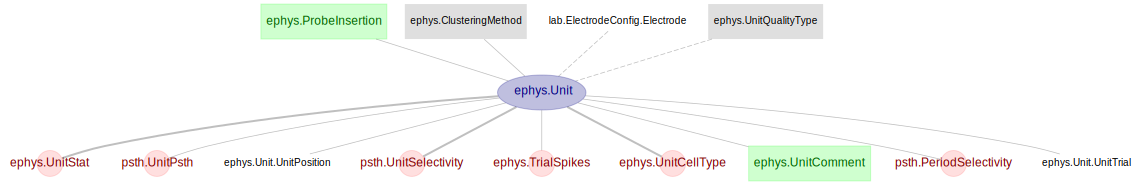

In [21]:
unit_erd

In [22]:
ephys.Unit & session_key

*subject_id    *session    *insertion_num *clustering_me *unit    unit_uid     unit_quality   probe          electrode_conf electrode_grou electrode     unit_posx      unit_posy      spike_time unit_amp      unit_snr      waveform  
+------------+ +---------+ +------------+ +------------+ +------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +------------+ +--------+ +-----------+ +-----------+ +--------+
435884         1           1              jrclust        1        1            good           15131808323    npx_first384   0              6             42.45447921752 33.69925689697 =BLOB=     294.20157     13.780584     =BLOB=    
435884         1           1              jrclust        2        2            all            15131808323    npx_first384   0              4             29.58551216125 14.67079067230 =BLOB=     344.143       16.491089     =BLOB=    
435884         1           1              jrclust        3        3            all            15131808323    npx_first384   0              5             16.06205749511 38.76766204833 =BLOB=     287.36014     10.473887     =BLOB=    
435884         1           1              jrclust        4        4            all            15131808323    npx_first384   0              5             15.02034187316 43.26382827758 =BLOB=     154.78827     7.615032      =BLOB=    
435884         1           1              jrclust        5        5            good           15131808323    npx_first384   0              5             14.33855056762 38.97854614257 =BLOB=     157.83987     7.869556      =BLOB=    
435884         1           1              jrclust        6        6            all            15131808323    npx_first384   0              6             40.07226943969 45.23943328857 =BLOB=     161.41177     7.1355534     =BLOB=    
435884         1           1              jrclust        7        7            all            15131808323    npx_first384   0              7             1.467831850051 61.98297882080 =BLOB=     215.175       12.520164     =BLOB=    
   ...
 (Total: 214)

In [23]:
good_units = ephys.Unit & session_key & {'unit_quality': 'good'}
good_units

*subject_id    *session    *insertion_num *clustering_me *unit    unit_uid     unit_quality   probe          electrode_conf electrode_grou electrode     unit_posx      unit_posy      spike_time unit_amp      unit_snr      waveform  
+------------+ +---------+ +------------+ +------------+ +------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +------------+ +--------+ +-----------+ +-----------+ +--------+
435884         1           1              jrclust        1        1            good           15131808323    npx_first384   0              6             42.45447921752 33.69925689697 =BLOB=     294.20157     13.780584     =BLOB=    
435884         1           1              jrclust        5        5            good           15131808323    npx_first384   0              5             14.33855056762 38.97854614257 =BLOB=     157.83987     7.869556      =BLOB=    
435884         1           1              jrclust        10       10           good           15131808323    npx_first384   0              10            44.27643966674 79.20182800292 =BLOB=     275.46558     13.48085      =BLOB=    
435884         1           1              jrclust        11       11           good           15131808323    npx_first384   0              10            45.54263305664 80.29844665527 =BLOB=     117.8578      6.137078      =BLOB=    
435884         1           1              jrclust        15       15           good           15131808323    npx_first384   0              12            31.08588409423 98.89152526855 =BLOB=     242.60864     14.416281     =BLOB=    
435884         1           1              jrclust        18       18           good           15131808323    npx_first384   0              18            45.05342483520 159.8887329101 =BLOB=     142.01253     8.705505      =BLOB=    
435884         1           1              jrclust        21       21           good           15131808323    npx_first384   0              22            46.28873443603 199.1356201171 =BLOB=     411.5883      19.068323     =BLOB=    
   ...
 (Total: 59)

## Unit selectivity

In [24]:
psth.UnitSelectivity & good_units

*subject_id    *session    *insertion_num *clustering_me *unit    unit_selectivi
+------------+ +---------+ +------------+ +------------+ +------+ +------------+
435884         1           1              jrclust        1        non-selective 
435884         1           1              jrclust        5        ipsi-selective
435884         1           1              jrclust        10       contra-selecti
435884         1           1              jrclust        11       ipsi-selective
435884         1           1              jrclust        15       non-selective 
435884         1           1              jrclust        18       ipsi-selective
435884         1           1              jrclust        21       ipsi-selective
   ...
 (Total: 59)

### Pick one unit

In [25]:
unit_key = (psth.UnitSelectivity & good_units & 'unit=5').fetch1('KEY')
unit_key                                                                 

{'subject_id': 435884,
 'session': 1,
 'insertion_number': 1,
 'clustering_method': 'jrclust',
 'unit': 5}

### Unit PSTH

In [26]:
upsth_erd = (dj.ERD(psth.UnitPsth) - 1)

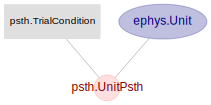

In [27]:
upsth_erd

In [28]:
psth.TrialCondition()

*trial_conditi trial_conditio trial_conditio trial_cond
+------------+ +------------+ +------------+ +--------+
all_noearlylic 9dbe618e8775ba _get_trials_ex =BLOB=    
all_noearlylic 098bfce10178ea _get_trials_ex =BLOB=    
all_noearlylic 6263635bae2d51 _get_trials_ex =BLOB=    
all_noearlylic 910cfcd39d7a17 _get_trials_in =BLOB=    
all_noearlylic b19705e539f7b9 _get_trials_in =BLOB=    
all_noearlylic b51fdd205268f3 _get_trials_in =BLOB=    
good_noearlyli 736552c7bdc75b _get_trials_ex =BLOB=    
   ...
 (Total: 11)

In [29]:
unit_psth = psth.UnitPsth * psth.TrialCondition & unit_key & 'trial_condition_name = "good_noearlylick_hit"'

In [30]:
psth_trace, edges = unit_psth.fetch1('unit_psth')

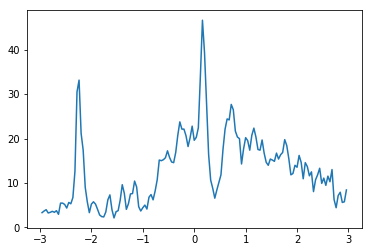

In [31]:
plt.plot(edges[1:], psth_trace)

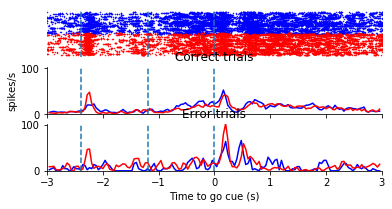

In [32]:
plot.unit_psth(unit_key)

# ================================================